In [40]:
from dataset import *
from helpers.ipython import *
from helpers.model import LogisticXGB, TuneXGB, get_model_feature_scores

%matplotlib inline

In [11]:
def get_y():
    return data.get('train', col='target')

def get_X(dset='train'):
    X = data.extract(dset, [
        ('data', None),
        ('nans', None),
    ], drop_cols=['target'])
    
    nums = X.select_dtypes(exclude=['category']).columns
    X[nums] = X[nums].fillna(-99999999)
    return X

X, y = get_X(), get_y()

In [19]:
cv = skl.cross_validation.StratifiedKFold(y, shuffle=True, random_state=1234, n_folds=5)
tuner = TuneXGB(LogisticXGB, X, y, metric='logloss', cv=cv)
tuner.best_max_depth = 7
tuner.best_min_child_weight = 1
tuner.best_gamma = 0.4
tuner.best_subsample = 1.0
tuner.best_colsample_bytree = 1.0

In [4]:
scores = tuner.tune_depth()

{'max_depth': 3, 'min_child_weight': 1}
Will train until validation_0 error hasn't decreased in 25 rounds.
[0]	validation_0-logloss:0.644713
[10]	validation_0-logloss:0.493414
[20]	validation_0-logloss:0.481443
[30]	validation_0-logloss:0.477944
[40]	validation_0-logloss:0.476111
[50]	validation_0-logloss:0.474781
[60]	validation_0-logloss:0.474085
[70]	validation_0-logloss:0.473747
[80]	validation_0-logloss:0.473649
[90]	validation_0-logloss:0.473412
[100]	validation_0-logloss:0.473283
[110]	validation_0-logloss:0.472122
[120]	validation_0-logloss:0.471944
[130]	validation_0-logloss:0.471785
[140]	validation_0-logloss:0.471740
[150]	validation_0-logloss:0.471806
[160]	validation_0-logloss:0.471745
Stopping. Best iteration:
[135]	validation_0-logloss:0.471663

Will train until validation_0 error hasn't decreased in 25 rounds.
[0]	validation_0-logloss:0.644531
[10]	validation_0-logloss:0.493166
[20]	validation_0-logloss:0.480428
[30]	validation_0-logloss:0.476240
[40]	validation_0-loglo

In [5]:
scores

,score,ntree,max_depth,min_child_weight
0,0.467301,84.4,7,5
13,0.467429,61.4,8,6
14,0.467516,87.6,6,6
15,0.467542,52.8,8,5
16,0.467644,71.6,6,5
1,0.467752,49.0,7,1
2,0.467888,70.8,7,3
17,0.467920,62.0,7,4
18,0.467937,61.2,7,6
19,0.468055,60.2,8,4


In [7]:
tuner.early_stopping_rounds = 100
score2 = tuner.train_models_cv_score({
    'learning_rate': 0.05,
    'max_depth': 7,
    'min_child_weight': 5
}, progress=True)

Will train until validation_0 error hasn't decreased in 100 rounds.
[0]	validation_0-logloss:0.679870
[10]	validation_0-logloss:0.579789
[20]	validation_0-logloss:0.525064
[30]	validation_0-logloss:0.496858
[40]	validation_0-logloss:0.482984
[50]	validation_0-logloss:0.476054
[60]	validation_0-logloss:0.472570
[70]	validation_0-logloss:0.470724
[80]	validation_0-logloss:0.469659
[90]	validation_0-logloss:0.468879
[100]	validation_0-logloss:0.468366
[110]	validation_0-logloss:0.467637
[120]	validation_0-logloss:0.467267
[130]	validation_0-logloss:0.466908
[140]	validation_0-logloss:0.466745
[150]	validation_0-logloss:0.466464
[160]	validation_0-logloss:0.466261
[170]	validation_0-logloss:0.466230
[180]	validation_0-logloss:0.466224
[190]	validation_0-logloss:0.466030
[200]	validation_0-logloss:0.465934
[210]	validation_0-logloss:0.465831
[220]	validation_0-logloss:0.465654
[230]	validation_0-logloss:0.465683
[240]	validation_0-logloss:0.465564
[250]	validation_0-logloss:0.465548
[260]	v

In [9]:
tuner.early_stopping_rounds = 100
score3 = tuner.train_models_cv_score({
    'learning_rate': 0.05,
    'max_depth': 7,
    'min_child_weight': 1
}, progress=True)

Will train until validation_0 error hasn't decreased in 100 rounds.
[0]	validation_0-logloss:0.679870
[10]	validation_0-logloss:0.579597
[20]	validation_0-logloss:0.524788
[30]	validation_0-logloss:0.496503
[40]	validation_0-logloss:0.482513
[50]	validation_0-logloss:0.475588
[60]	validation_0-logloss:0.472218
[70]	validation_0-logloss:0.470258
[80]	validation_0-logloss:0.469173
[90]	validation_0-logloss:0.468076
[100]	validation_0-logloss:0.467557
[110]	validation_0-logloss:0.467021
[120]	validation_0-logloss:0.466627
[130]	validation_0-logloss:0.466300
[140]	validation_0-logloss:0.466021
[150]	validation_0-logloss:0.465838
[160]	validation_0-logloss:0.465666
[170]	validation_0-logloss:0.465681
[180]	validation_0-logloss:0.465567
[190]	validation_0-logloss:0.465449
[200]	validation_0-logloss:0.465424
[210]	validation_0-logloss:0.465302
[220]	validation_0-logloss:0.465257
[230]	validation_0-logloss:0.465075
[240]	validation_0-logloss:0.464962
[250]	validation_0-logloss:0.464910
[260]	v

In [8]:
score2

# 0.464557
# 0.461659
# 0.466778
# 0.466564
# 0.467459

### 0.465403

{'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 5,
 'ntree': 416.80000000000001,
 'score': 0.46540339999999991}

In [10]:
score3
# 0.464363
# 0.461174
# 0.465787
# 0.465569
# 0.467520

### 0.464882

{'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 1,
 'ntree': 381.80000000000001,
 'score': 0.46488259999999998}

In [13]:
scores = tuner.tune_gamma()

{'gamma': 0.0}
Will train until validation_0 error hasn't decreased in 25 rounds.
[0]	validation_0-logloss:0.643221
[10]	validation_0-logloss:0.479473
[20]	validation_0-logloss:0.469572
[30]	validation_0-logloss:0.467415
[40]	validation_0-logloss:0.467100
[50]	validation_0-logloss:0.467244
[60]	validation_0-logloss:0.467527
Stopping. Best iteration:
[35]	validation_0-logloss:0.466760

Will train until validation_0 error hasn't decreased in 25 rounds.
[0]	validation_0-logloss:0.643059
[10]	validation_0-logloss:0.477586
[20]	validation_0-logloss:0.467526
[30]	validation_0-logloss:0.465657
[40]	validation_0-logloss:0.465405
[50]	validation_0-logloss:0.465042
[60]	validation_0-logloss:0.465013
[70]	validation_0-logloss:0.464388
[80]	validation_0-logloss:0.464807
[90]	validation_0-logloss:0.464817
Stopping. Best iteration:
[70]	validation_0-logloss:0.464388

Will train until validation_0 error hasn't decreased in 25 rounds.
[0]	validation_0-logloss:0.643521
[10]	validation_0-logloss:0.48096

In [14]:
scores

,score,ntree,gamma
0,0.467130,59.2,0.40
1,0.467316,60.6,0.30
6,0.467383,65.4,0.35
7,0.467602,59.4,0.45
2,0.467752,49.0,0.00
3,0.467826,62.0,0.20
4,0.467836,63.8,0.10


In [15]:
tuner.early_stopping_rounds = 100
gamma_score2 = tuner.train_models_cv_score({
    'learning_rate': 0.05,
    'gamma': 0.40
}, progress=True)

Will train until validation_0 error hasn't decreased in 100 rounds.
[0]	validation_0-logloss:0.679870
[10]	validation_0-logloss:0.579601
[20]	validation_0-logloss:0.524789
[30]	validation_0-logloss:0.496447
[40]	validation_0-logloss:0.482559
[50]	validation_0-logloss:0.475681
[60]	validation_0-logloss:0.472239
[70]	validation_0-logloss:0.470443
[80]	validation_0-logloss:0.469300
[90]	validation_0-logloss:0.468438
[100]	validation_0-logloss:0.467660
[110]	validation_0-logloss:0.467098
[120]	validation_0-logloss:0.466807
[130]	validation_0-logloss:0.466496
[140]	validation_0-logloss:0.466096
[150]	validation_0-logloss:0.465975
[160]	validation_0-logloss:0.465800
[170]	validation_0-logloss:0.465746
[180]	validation_0-logloss:0.465502
[190]	validation_0-logloss:0.465496
[200]	validation_0-logloss:0.465580
[210]	validation_0-logloss:0.465518
[220]	validation_0-logloss:0.465456
[230]	validation_0-logloss:0.465479
[240]	validation_0-logloss:0.465411
[250]	validation_0-logloss:0.465220
[260]	v

In [17]:
tuner.early_stopping_rounds = 100
gamma_score3 = tuner.train_models_cv_score({
    'learning_rate': 0.05,
    'gamma': 0.0
}, progress=True)

Will train until validation_0 error hasn't decreased in 100 rounds.
[0]	validation_0-logloss:0.679870
[10]	validation_0-logloss:0.579597
[20]	validation_0-logloss:0.524788
[30]	validation_0-logloss:0.496503
[40]	validation_0-logloss:0.482513
[50]	validation_0-logloss:0.475588
[60]	validation_0-logloss:0.472218
[70]	validation_0-logloss:0.470258
[80]	validation_0-logloss:0.469173
[90]	validation_0-logloss:0.468076
[100]	validation_0-logloss:0.467557
[110]	validation_0-logloss:0.467021
[120]	validation_0-logloss:0.466627
[130]	validation_0-logloss:0.466300
[140]	validation_0-logloss:0.466021
[150]	validation_0-logloss:0.465838
[160]	validation_0-logloss:0.465666
[170]	validation_0-logloss:0.465681
[180]	validation_0-logloss:0.465567
[190]	validation_0-logloss:0.465449
[200]	validation_0-logloss:0.465424
[210]	validation_0-logloss:0.465302
[220]	validation_0-logloss:0.465257
[230]	validation_0-logloss:0.465075
[240]	validation_0-logloss:0.464962
[250]	validation_0-logloss:0.464910
[260]	v

In [18]:
print gamma_score2
print gamma_score3

{'learning_rate': 0.05, 'score': 0.4647848, 'gamma': 0.4, 'ntree': 424.0}
{'learning_rate': 0.05, 'score': 0.46488259999999998, 'gamma': 0.0, 'ntree': 381.80000000000001}


In [22]:
scores = tuner.score_params({
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
})

{'subsample': 0.8, 'colsample_bytree': 0.8}
Will train until validation_0 error hasn't decreased in 25 rounds.
[0]	validation_0-logloss:0.644245
[10]	validation_0-logloss:0.481361
[20]	validation_0-logloss:0.469755
[30]	validation_0-logloss:0.468351
[40]	validation_0-logloss:0.468541
[50]	validation_0-logloss:0.468343
Stopping. Best iteration:
[33]	validation_0-logloss:0.468180

Will train until validation_0 error hasn't decreased in 25 rounds.
[0]	validation_0-logloss:0.643115
[10]	validation_0-logloss:0.478698
[20]	validation_0-logloss:0.467376
[30]	validation_0-logloss:0.465806
[40]	validation_0-logloss:0.465287
[50]	validation_0-logloss:0.464906
[60]	validation_0-logloss:0.464664
[70]	validation_0-logloss:0.465257
[80]	validation_0-logloss:0.465213
Stopping. Best iteration:
[59]	validation_0-logloss:0.464518

Will train until validation_0 error hasn't decreased in 25 rounds.
[0]	validation_0-logloss:0.643660
[10]	validation_0-logloss:0.482061
[20]	validation_0-logloss:0.471702
[30]

In [23]:
scores

,score,ntree,subsample,colsample_bytree
8,0.467130,59.2,1.0,1.0
7,0.467313,68.4,1.0,0.9
6,0.467530,69.2,1.0,0.8
5,0.467703,55.0,0.9,1.0
3,0.468002,56.0,0.9,0.8
4,0.468023,59.0,0.9,0.9
0,0.468687,42.4,0.8,0.8
2,0.469093,46.6,0.8,1.0
1,0.469104,45.2,0.8,0.9


In [25]:
tuner.early_stopping_rounds = 100
final_scores = tuner.train_models_cv_score({
    'learning_rate': 0.02,
}, progress=True, mean=False)

Will train until validation_0 error hasn't decreased in 100 rounds.
[0]	validation_0-logloss:0.687772
[10]	validation_0-logloss:0.639500
[20]	validation_0-logloss:0.600553
[30]	validation_0-logloss:0.570009
[40]	validation_0-logloss:0.545970
[50]	validation_0-logloss:0.527446
[60]	validation_0-logloss:0.513156
[70]	validation_0-logloss:0.502315
[80]	validation_0-logloss:0.494045
[90]	validation_0-logloss:0.487905
[100]	validation_0-logloss:0.483307
[110]	validation_0-logloss:0.479799
[120]	validation_0-logloss:0.477100
[130]	validation_0-logloss:0.475045
[140]	validation_0-logloss:0.473575
[150]	validation_0-logloss:0.472371
[160]	validation_0-logloss:0.471510
[170]	validation_0-logloss:0.470768
[180]	validation_0-logloss:0.470195
[190]	validation_0-logloss:0.469780
[200]	validation_0-logloss:0.469362
[210]	validation_0-logloss:0.468966
[220]	validation_0-logloss:0.468475
[230]	validation_0-logloss:0.468172
[240]	validation_0-logloss:0.467861
[250]	validation_0-logloss:0.467571
[260]	v

In [26]:
final_scores

,model,ntree,score
1,"LogisticXGB(base_score=0.5, colsample_bylevel=...",643,0.461777
0,"LogisticXGB(base_score=0.5, colsample_bylevel=...",619,0.464807
3,"LogisticXGB(base_score=0.5, colsample_bylevel=...",886,0.465241
2,"LogisticXGB(base_score=0.5, colsample_bylevel=...",864,0.465795
4,"LogisticXGB(base_score=0.5, colsample_bylevel=...",867,0.467468


In [31]:
print final_scores['ntree'].mean()
print final_scores['score'].mean()

print final_scores['ntree'].max() * (float(len(y)) / tuner.get_cv_train_size())

775.8
0.4650176
1107.50968772


In [52]:
model = tuner.build_model({
    'learning_rate': 0.02,
    'n_estimators': 1000,
})
tuner.apply_cv(model)
model.fit(X, y)

Will train until validation_0 error hasn't decreased in 100 rounds.
[0]	validation_0-logloss:0.687662
[10]	validation_0-logloss:0.638273
[20]	validation_0-logloss:0.598155
[30]	validation_0-logloss:0.566561
[40]	validation_0-logloss:0.541672
[50]	validation_0-logloss:0.522275
[60]	validation_0-logloss:0.507111
[70]	validation_0-logloss:0.495362
[80]	validation_0-logloss:0.486229
[90]	validation_0-logloss:0.479224
[100]	validation_0-logloss:0.473774
[110]	validation_0-logloss:0.469289
[120]	validation_0-logloss:0.465668
[130]	validation_0-logloss:0.462786
[140]	validation_0-logloss:0.460360
[150]	validation_0-logloss:0.458222
[160]	validation_0-logloss:0.456293
[170]	validation_0-logloss:0.454667
[180]	validation_0-logloss:0.453199
[190]	validation_0-logloss:0.451847
[200]	validation_0-logloss:0.450392
[210]	validation_0-logloss:0.448957
[220]	validation_0-logloss:0.447637
[230]	validation_0-logloss:0.446595
[240]	validation_0-logloss:0.445626
[250]	validation_0-logloss:0.444537
[260]	v

LogisticXGB(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
      gamma=0.4, learning_rate=0.02, max_delta_step=1, max_depth=7,
      min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
      objective='binary:logistic', reg_alpha=0, reg_lambda=1,
      scale_pos_weight=1, seed=1234, silent=True, subsample=1)

In [53]:
data.store.save(model, 'xgb_tune_2')

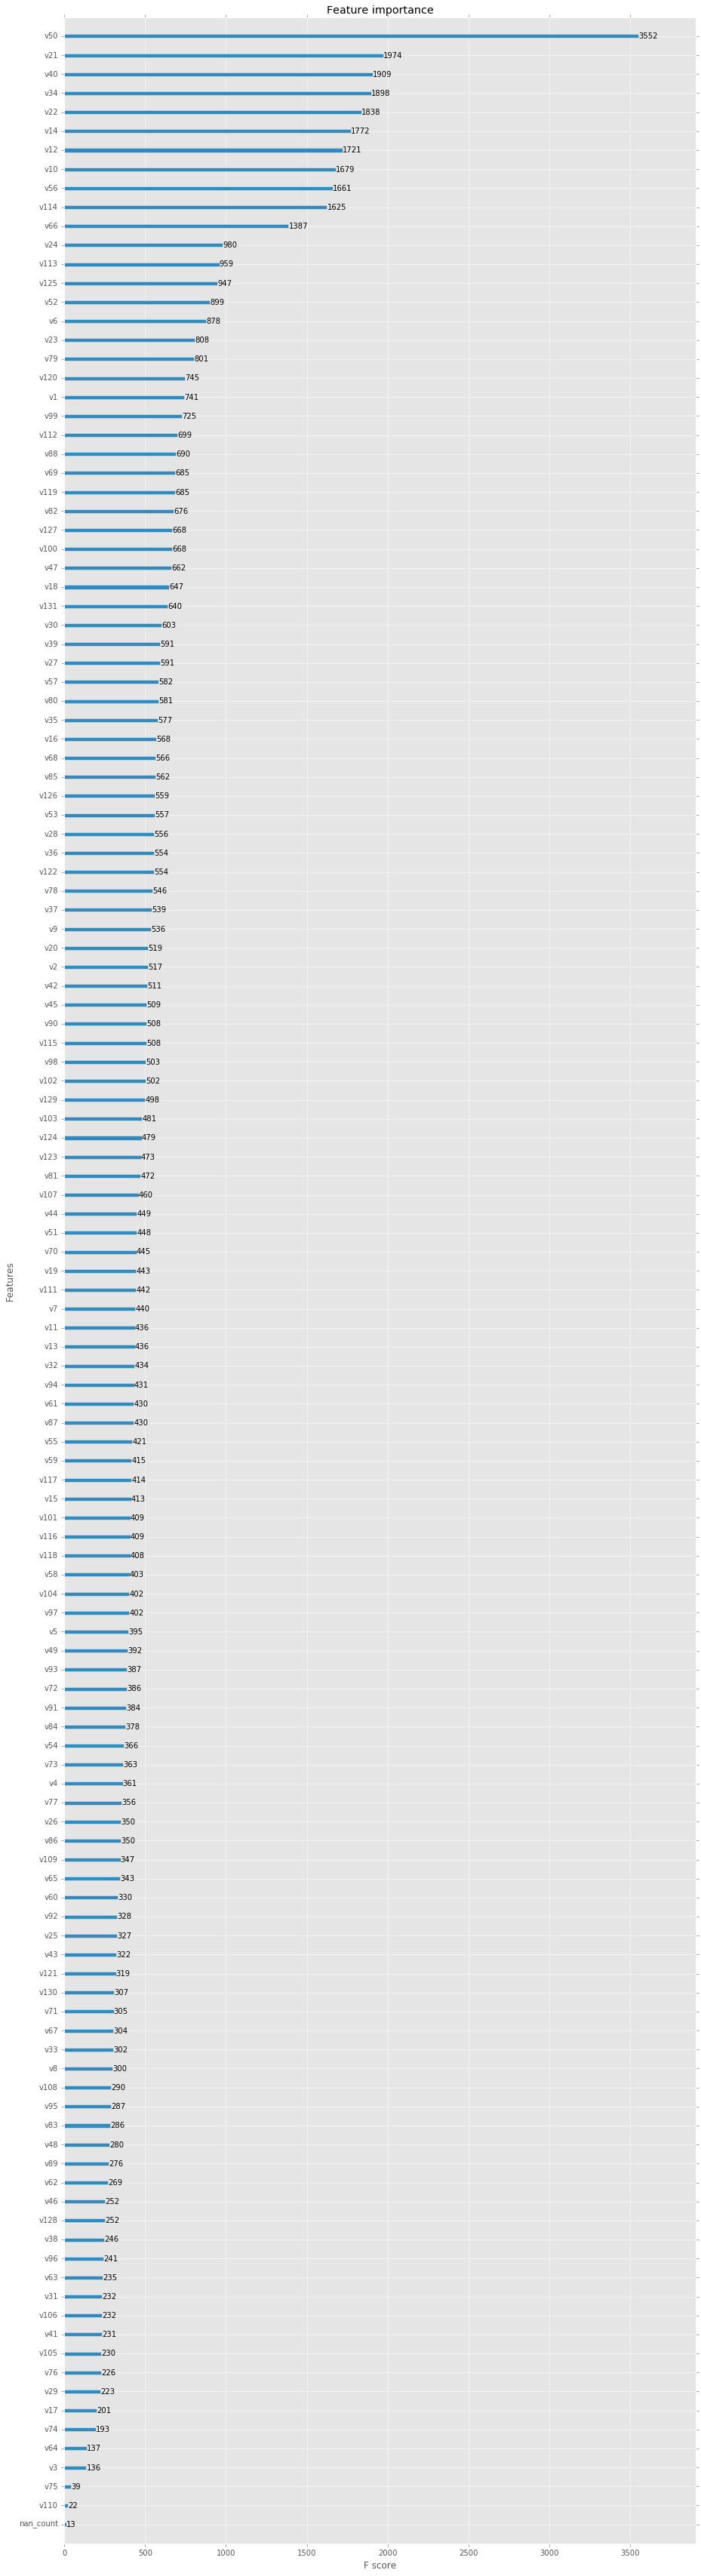

In [46]:
figsize(15, 60)
model.plot_importance()

In [54]:
test = get_X('test')
proba = pd.DataFrame({'PredictedProb': model.predict_proba(test)[:, 1]}, index=test.index)
proba.to_csv('./output/xgb_tune_2.csv')